# House Prices Advanced Regression

Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_style('darkgrid')
sns.set_palette('Spectral')


In [3]:
train=pd.read_csv('train.csv')

In [83]:
test=pd.read_csv('test.csv')

In [5]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [80]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


Seperating Target column from Training data and concatenating train & test data

In [7]:
data=pd.concat([train.drop('SalePrice',axis=1),test])
target=train['SalePrice']
data=data.reset_index().drop('index',axis=1)

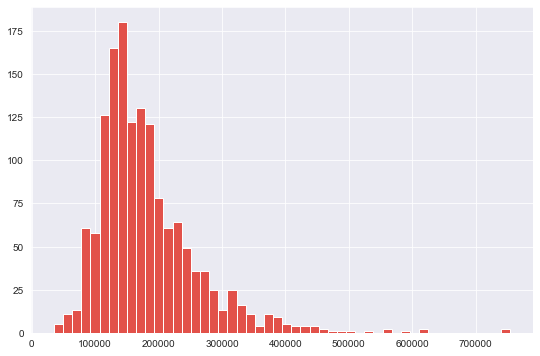

In [8]:
target.hist(bins=50,figsize=(9,6))

Creating a Function that constructs % Occurance

In [9]:
def occurance(data,x=5):
    data_occurance=pd.DataFrame(index=data.columns)
    data_occurance['indexx']=[i for i in range(len(data.columns))] #for putting index ajdacent to actual index
    data_occurance['% occurance at 1']=[data[i].value_counts().iloc[0]/len(data[i])*100 for i in data_occurance.index]
    data_occurance['value of occurance at 1']=[data[i].value_counts().index[0] for i in data_occurance.index]
    data_occurance['Total unique items']=[data[i].nunique() for i in data_occurance.index]
    data_occurance['% occurance at 2']=[data[i].value_counts().iloc[1]/len(data[i])*100 for i in data_occurance.index]
    data_occurance['value of occurance at 2']=[data[i].value_counts().index[1] for i in data_occurance.index]
    #
    data_occurance=data_occurance.sort_values(by='% occurance at 2')
    data_occurance['indexx']=[i for i in range(len(data_occurance.index))]
    return data_occurance.head(x)
occurance(data,50)

,indexx,% occurance at 1,value of occurance at 1,Total unique items,% occurance at 2,value of occurance at 2
Id,0,0.034258,2047,2919,0.034258,1088
PoolArea,1,99.554642,0,14,0.034258,561
Utilities,2,99.897225,AllPub,2,0.034258,NoSeWa
3SsnPorch,3,98.732443,0,31,0.102775,153
PoolQC,4,0.137033,Gd,3,0.137033,Ex
LowQualFinSF,5,98.629668,0,36,0.137033,80
BsmtFinSF2,6,88.078109,0,272,0.171292,294
MiscFeature,7,3.254539,Shed,4,0.171292,Gar2
Street,8,99.588900,Pave,2,0.411100,Grvl
ScreenPorch,9,91.229873,0,121,0.445358,144


Dropping columns having almost same values, we evaluate the columns based on %occurance 2 (having a very low %occurance 2 means it has either many null values with a value that has high occurance or each term is distinct like ID)

In [10]:
oc=occurance(data,50)
drop_by_occurance=[]
for i,j,k in list(zip(oc['indexx'],oc['Total unique items'],oc['% occurance at 2'])):
    if (k<2) & (j<25):
        drop_by_occurance.append(oc.index[i])
for i,j in enumerate(oc['% occurance at 1']):
    if j>96:
        drop_by_occurance.append(oc.index[i])
drop_by_occurance=list(set(drop_by_occurance)) #to remove duplicates

In [11]:
data1=data.drop(drop_by_occurance,axis=1)

Creating a Function that constructs % Missing Values

In [12]:
def missing(data,x=5):
    data_info=pd.DataFrame(index=data.columns)
    data_info['% missing']=[sum(data[i].isnull())/len(data[i])*100 for i in data_info.index]
    data_info['value_count']=[ dict(data[i].value_counts()) for i in data_info.index]
    data_info['data_type']=[data[i].dtypes for i in data_info.index]
    data_info=data_info.sort_values(by='% missing',ascending=False)
    return data_info.head(x)
missing(data1,6)

,% missing,value_count,data_type
Alley,93.216855,"{'Grvl': 120, 'Pave': 78}",object
Fence,80.438506,"{'MnPrv': 329, 'GdPrv': 118, 'GdWo': 112, 'MnW...",object
FireplaceQu,48.646797,"{'Gd': 744, 'TA': 592, 'Fa': 74, 'Po': 46, 'Ex...",object
LotFrontage,16.649538,"{60.0: 276, 80.0: 137, 70.0: 133, 50.0: 117, 7...",float64
GarageFinish,5.447071,"{'Unf': 1230, 'RFn': 811, 'Fin': 719}",object
GarageYrBlt,5.447071,"{2005.0: 142, 2006.0: 115, 2007.0: 115, 2004.0...",float64


Dropping columns having Missing values > 90%

In [13]:
drop_by_occurance.append(missing(data1,10).index[0])
drop_by_occurance

['3SsnPorch',
 'RoofMatl',
 'LowQualFinSF',
 'Utilities',
 'MiscFeature',
 'PoolArea',
 'Heating',
 'Street',
 'Condition2',
 'MiscVal',
 'PoolQC',
 'Alley']

In [14]:
data1=data.drop(drop_by_occurance,axis=1)
data1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,...,Y,0,61,0,0,NaN,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,...,Y,298,0,0,0,NaN,5,2007,WD,Normal
2,3,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,...,Y,0,42,0,0,NaN,9,2008,WD,Normal
3,4,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,...,Y,0,35,272,0,NaN,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,...,Y,192,84,0,0,NaN,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Reg,Lvl,Inside,Gtl,MeadowV,...,Y,0,0,0,0,NaN,6,2006,WD,Normal
2915,2916,160,RM,21.0,1894,Reg,Lvl,Inside,Gtl,MeadowV,...,Y,0,24,0,0,NaN,4,2006,WD,Abnorml
2916,2917,20,RL,160.0,20000,Reg,Lvl,Inside,Gtl,Mitchel,...,Y,474,0,0,0,NaN,9,2006,WD,Abnorml
2917,2918,85,RL,62.0,10441,Reg,Lvl,Inside,Gtl,Mitchel,...,Y,80,32,0,0,MnPrv,7,2006,WD,Normal


Separating numerical and categorical columns by creating a series of data type

In [15]:
dtype=pd.Series([data1[i].dtypes for i in data1.columns],index=[i for i in data1.columns])
dtype

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
Fence             object
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 68, dtype: object

In [16]:
col_object=[]
col_int=[]
for i,j in list(zip(dtype,dtype.index)):
    if i=='object':
        col_object.append(j)
    elif (i=='int64') | (i=='float64'):
        col_int.append(j)

Filling the Categorical columns

with 'missing' Key word (if % missing is high)

In [17]:
for i in missing(data1[col_object]).index[[0,1]]:
    data1[i].fillna('missing',inplace=True)

with their respective mode (if % missing is low)

In [18]:
for i in col_object:
    data1[i].fillna(data1[i].value_counts().index[0],inplace=True)

In [19]:
missing(data1[col_object])

,% missing,value_count,data_type
MSZoning,0.0,"{'RL': 2269, 'RM': 460, 'FV': 139, 'RH': 26, '...",object
FireplaceQu,0.0,"{'missing': 1420, 'Gd': 744, 'TA': 592, 'Fa': ...",object
BsmtFinType2,0.0,"{'Unf': 2573, 'Rec': 105, 'LwQ': 87, 'BLQ': 68...",object
HeatingQC,0.0,"{'Ex': 1493, 'TA': 857, 'Gd': 474, 'Fa': 92, '...",object
CentralAir,0.0,"{'Y': 2723, 'N': 196}",object


Filling the Numerical columns with their respective means

In [20]:
for i in col_int:
    data1[i].fillna(np.mean(data1[i]),inplace=True)

Applying Label Encoder on Ordinal columns

In [21]:
ordinal_cols='LotShape,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtFinSF2,BsmtFinType2,BsmtFinType1,BsmtExposure,BsmtCond,BsmtQual,HeatingQC,KitchenQual,FireplaceQu,GarageFinish,GarageQual,GarageCond,Fence'.split(',')

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
for i in ordinal_cols:
    le=LabelEncoder()
    data1[i]=le.fit_transform(data1[i])

Applying One hot encoding on rest of the Categorical columns

In [77]:
data3=pd.get_dummies(data1,drop_first=True)
data2=data3.drop('Id',axis=1) #important to drop id because it doesnt add any value to the model (just an increasing value)
data2

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,3,0,6,4,2003,2003,196.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,3,0,5,7,1976,1976,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,0,0,6,4,2001,2002,162.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,0,0,6,4,1915,1970,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,0,0,7,4,2000,2000,350.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,21.0,1936,3,0,3,6,1970,1970,0.0,...,0,0,0,0,1,0,0,0,1,0
2915,160,21.0,1894,3,0,3,4,1970,1970,0.0,...,0,0,0,0,1,0,0,0,0,0
2916,20,160.0,20000,3,0,4,6,1960,1996,0.0,...,0,0,0,0,1,0,0,0,0,0
2917,85,62.0,10441,3,0,4,4,1992,1992,0.0,...,0,0,0,0,1,0,0,0,1,0


Seperating Train and Test data out of the complete train dataset 

In [79]:
train_full=data2[:1460]
test_full=data2[1460:]
train_full.shape

(1460, 175)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(train_full, target, test_size=0.2)

Importing Necessary Models

In [28]:
from warnings import filterwarnings as fw 
fw('ignore')

In [29]:
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

A Function that'll a take list of models and param values and return a set of Best parameters, MSE and model name

In [30]:
def fit_predict(model,param):
    gs=GridSearchCV(model,param,cv=5,scoring='neg_root_mean_squared_error')
    gs.fit(X_train,y_train)
    tuned=gs.best_params_
    error=(mean_squared_error(y_test,gs.predict(X_test)))**0.5
    model_name=str(model).split('(')[0]
    return (tuned,error,model_name)

This function first transforms data in a Standardized and Normalized form and then return the same

In [38]:
ss=StandardScaler()
train_x=pd.DataFrame(ss.fit_transform(X_train),columns=X_train.columns)
test_x=pd.DataFrame(ss.fit_transform(X_test),columns=X_test.columns)
def std_fit_predict(model,param):
    gs=GridSearchCV(model,param,cv=5,scoring='neg_root_mean_squared_error')
    gs.fit(train_x,y_train)
    tuned=gs.best_params_
    error=(mean_squared_error(y_test,gs.predict(test_x)))**0.5
    model_name=str(model).split('(')[0]
    return (tuned,error,model_name)

Creating a list of models

In [39]:
model=[Lasso(),KNeighborsRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),SVR(),XGBRegressor()]

Creating a list of parameter dictonaries for each respective model

In [40]:
params1=[{'alpha':np.arange(0.24,1.24,0.25),'normalize':[True,False]},{'n_neighbors':np.arange(1,11,2)},{'n_estimators':[100,300,500]},{'n_estimators':[100,300,500],'max_depth':[1,3,5]},{'C':[0.1,1,10,100,1000],'gamma':[0.01,0.001]},{'n_estimators':[100,300,500],'max_depth':[3,5],'gamma':[0.1,0.05,0.01],'learning_rate':np.arange(0.05,0.5,0.15)}]

In [41]:
#params=[{'alpha':np.arange(0.25,1.0,0.25),'normalize':[True,False]},{'n_neighbors':np.arange(1,40,6)},{'n_estimators':[100,300,500],'max_depth':[1,3,5],'min_samples_leaf':[0.1,0.2]},{'n_estimators':[100,300,500],'max_depth':[1,3,5],'learning_rate':np.arange(0,1,0.2)},{'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001]},{'n_estimators':[100,300,500],'max_depth':[3,5,7],'gamma':[1,0.1,0.05,0.01],'learning_rate':np.arange(0.05,0.5,0.1)}]

Applying fit_predict (Function) on each model and creating a dataframe out of it

In [35]:
pre=[]
for i,j in list(zip(model,params1)):
    a=fit_predict(i,j)
    print(a)
    pre.append(a)

({'alpha': 0.99, 'normalize': True}, 40119.63771655767, 'Lasso')
({'n_neighbors': 5}, 41892.11442255366, 'KNeighborsRegressor')
({'n_estimators': 300}, 29287.753728250915, 'RandomForestRegressor')
({'max_depth': 3, 'n_estimators': 500}, 20911.990575258173, 'GradientBoostingRegressor')
({'C': 1000, 'gamma': 0.001}, 71708.41116565447, 'SVR')
({'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500}, 22187.86520600113, 'XGBRegressor')


In [36]:
pd.DataFrame(pre,columns=['Hyperparameter','RMSE','Model']).sort_values(by='RMSE').reset_index().drop('index',axis=1)

,Hyperparameter,RMSE,Model
0,"{'max_depth': 3, 'n_estimators': 500}",20911.990575,GradientBoostingRegressor
1,"{'gamma': 0.1, 'learning_rate': 0.05, 'max_dep...",22187.865206,XGBRegressor
2,{'n_estimators': 300},29287.753728,RandomForestRegressor
3,"{'alpha': 0.99, 'normalize': True}",40119.637717,Lasso
4,{'n_neighbors': 5},41892.114423,KNeighborsRegressor
5,"{'C': 1000, 'gamma': 0.001}",71708.411166,SVR


Applying std_fit_predict (Function) on each model and creating a dataframe out of it

In [42]:
std_pre=[]
for i,j in list(zip(model,params1)):
    a=std_fit_predict(i,j)
    print(a)
    std_pre.append(a)

({'alpha': 0.99, 'normalize': True}, 39200.74191557388, 'Lasso')
({'n_neighbors': 7}, 40626.723443578034, 'KNeighborsRegressor')
({'n_estimators': 500}, 30254.210049226094, 'RandomForestRegressor')
({'max_depth': 3, 'n_estimators': 300}, 22870.50996461427, 'GradientBoostingRegressor')
({'C': 1000, 'gamma': 0.001}, 59079.54981418948, 'SVR')
({'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500}, 22920.216483645232, 'XGBRegressor')


In [43]:
pd.DataFrame(std_pre,columns=['Hyperparameter','RMSE','Model']).sort_values(by='RMSE').reset_index().drop('index',axis=1)

,Hyperparameter,RMSE,Model
0,"{'max_depth': 3, 'n_estimators': 300}",22870.509965,GradientBoostingRegressor
1,"{'gamma': 0.1, 'learning_rate': 0.05, 'max_dep...",22920.216484,XGBRegressor
2,{'n_estimators': 500},30254.210049,RandomForestRegressor
3,"{'alpha': 0.99, 'normalize': True}",39200.741916,Lasso
4,{'n_neighbors': 7},40626.723444,KNeighborsRegressor
5,"{'C': 1000, 'gamma': 0.001}",59079.549814,SVR


We can clearly see that after using Standardized data the RMSE ie error reduced in those models which have a distance based computational algorithm

Least RMSE is of GradientBoostingRegressor without standarization

In [55]:
from sklearn.metrics import r2_score
gb=GradientBoostingRegressor(max_depth=3,n_estimators=500)
gb.fit(X_train,y_train)
print('r2_score',r2_score(y_test,gb.predict(X_test))*100)

r2_score 91.61138978208128


In [57]:
gb=GradientBoostingRegressor(max_depth=3,n_estimators=500)
gb.fit(train_full,target)
predictions=gb.predict(test_full)

In [86]:
submission=pd.DataFrame(test['Id'])

In [87]:
submission['SalePrice']=predictions

In [90]:
submission.head()

,Id,SalePrice
0,1461,119483.429667
1,1462,167019.706192
2,1463,181460.048659
3,1464,188302.055508
4,1465,180655.793106


In [91]:
submission.to_csv('submission.csv',index=False)